<a href="https://colab.research.google.com/github/JyothiAchanta97/DigitalImageProcess/blob/main/Ques4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

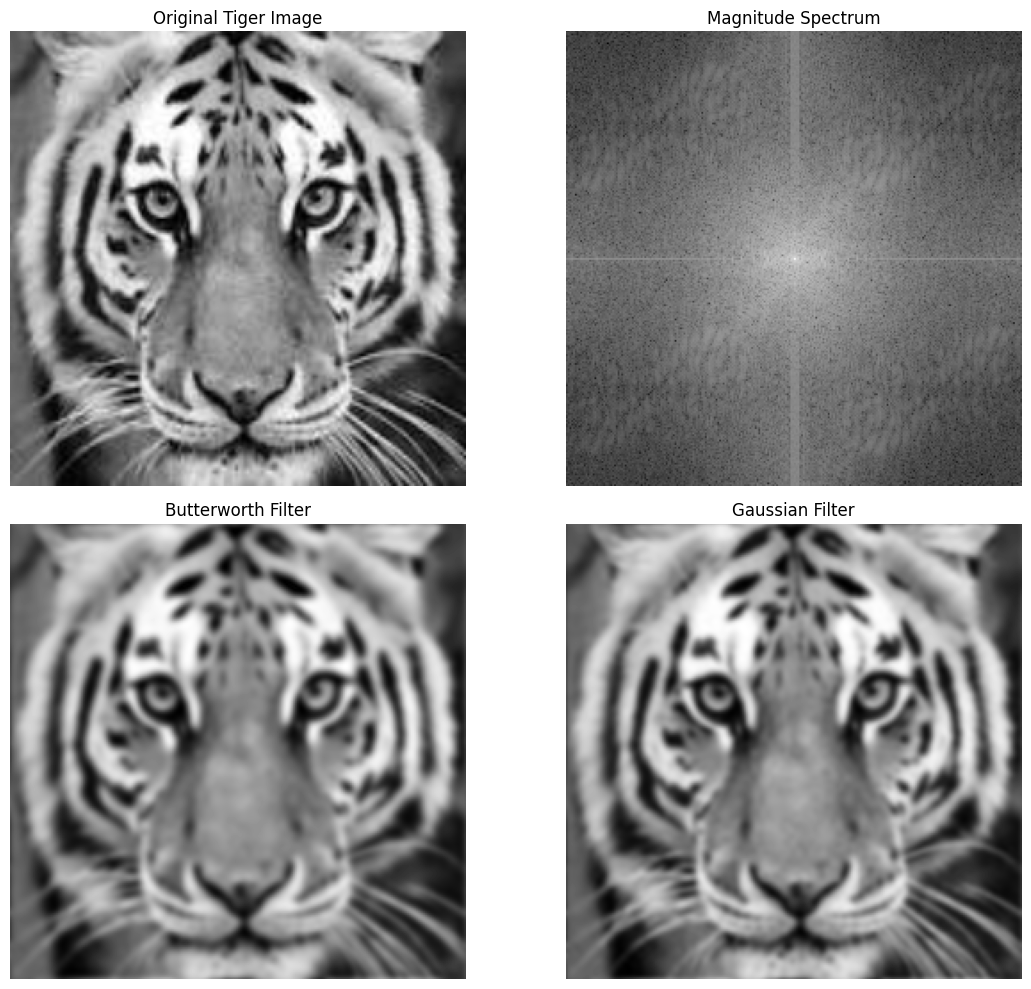

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def butterworth_filter(shape, cutoff, order=1):
    P, Q = shape
    D = np.zeros((P, Q))

    for u in range(P):
        for v in range(Q):
            D[u, v] = np.sqrt((u - P//2)**2 + (v - Q//2)**2)

    H = 1 / (1 + (D / cutoff)**(2 * order))
    return H

def gaussian_filter(shape, cutoff):
    P, Q = shape
    D = np.zeros((P, Q))

    for u in range(P):
        for v in range(Q):
            D[u, v] = np.sqrt((u - P//2)**2 + (v - Q//2)**2)

    H = np.exp(-(D**2) / (2 * (cutoff**2)))
    return H

# Adding image to filter
image = cv2.imread('tiger.jpeg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (256, 256))  # Resize for simplicity

# Applying Fourier Transform
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

# Magnitude Spectrum for an image
magnitude_spectrum = np.log(np.abs(fshift) + 1)

cutoff_frequency = 30
order = 2

# Creating both filters: Butterworth filter and Apply Gaussian filter
butter_filter = butterworth_filter(image.shape, cutoff_frequency, order)
gaussian_filter = gaussian_filter(image.shape, cutoff_frequency)

# Applying Butterworth filter for an original image
filtered_butter = fshift * butter_filter
inverse_butter = np.fft.ifftshift(filtered_butter)
img_butter = np.abs(np.fft.ifft2(inverse_butter))

# Applying Gaussian filter for an original image
filtered_gaussian = fshift * gaussian_filter
inverse_gaussian = np.fft.ifftshift(filtered_gaussian)
img_gaussian = np.abs(np.fft.ifft2(inverse_gaussian))

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.title('Original Tiger Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Magnitude Spectrum')
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

#Displaying Butterworth filter for an original image
plt.subplot(2, 2, 3)
plt.title('Butterworth Filter')
plt.imshow(img_butter, cmap='gray')
plt.axis('off')

#Displaying Gaussian filter for an original image
plt.subplot(2, 2, 4)
plt.title('Gaussian Filter')
plt.imshow(img_gaussian, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


# New Section